# <span style='color:Red'>When models meet data</span> (Ref: section 8.1 from book [[3]](https://mml-book.github.io/book/mml-book.pdf))
***

* ### There are three major components of a machine learning system: data, models, and learning.
* ### The main question of machine learning is “What do we mean by good models?”.
* ### One of the guiding principles is that good models should perform well on unseen data.
* ### This requires us to define some performance metrics, such as accuracy or distance from ground truth, as well as figuring out ways to do well under these performance metrics.
* ### There are two different senses in which we use the phrase “machine learning algorithm”: Training and Prediction.
* ## <span style='color:Blue'>Data as vectors:
    * ### We assume that our data can be read by a computer, and represented adequately in a numerical format.
    * ### Data is assumed to be tabular (Table 8.1), where we think of each row of the table as representing a particular instance or example, and each column to be a particular feature.
      <br>
    * &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;   <img src="images/Table_8_1.png" width="700" height="350">
    * ### In recent years, machine learning has been applied to many types of data that do not obviously come in the tabular numerical format, for example genomic sequences, text and image contents of a webpage, and social media graphs.
    * ### Even when we have data not in a numerical format, there are still choices to be made to obtain a numerical representation.
    * ### For example, in Table 8.1, the gender column (a categorical variable) may be converted into numbers -1 representing “Male” and 1 representing “Female”.
    * ### Furthermore, it is often important to use domain knowledge when constructing the representation, such as knowing that university degrees progress from bachelor’s to master’s to PhD or realizing that the postcode provided is not just a string of characters but actually encodes an area in London.
    * ### In Table 8.2, we converted the data from Table 8.1 to a numerical format, and each postcode is represented as two numbers, a latitude and longitude.
    * &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;   <img src="images/Table_8_2.png" width="700" height="350">
    * ### Even numerical data that could potentially be directly read into a machine learning algorithm should be carefully considered for units, scaling, and constraints.
    * ### We consider a dataset to be of the form as illustrated by Table 8.2. Observe that we have dropped the Name column of Table 8.1 in the new numerical representation.
    * ### There are two main reasons why this is desirable: (1) we do not expect the identifier (the Name) to be informative for a machine learning task; and (2) we may wish to anonymize the data to help protect the privacy of the employees.
      <br>
    * ### Here, we will use $N$ to denote the number of examples in a dataset and index the examples with lowercase $t = 1, . . . ,N$.
    * ### We assume that we are given a set of numerical data, represented as an array of vectors (Table 8.2).
    * ### Each row is a particular individual $\mathbf{x}^t$, often referred to as an example or data point in machine learning. The superscript $t$ refers to the fact that this is the $t^{th}$ example out of a total of N data points in the dataset.
    * &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;   <img src="images/Table2.png" width="600" height="300">
    * ### Each column represents a particular feature of interest about the example, and we index the features as d = 1, . . . ,D.
    * ### Recall that data is represented as vectors, which means that each example (each data point) is a D-dimensional vector.
      <br>
* ## <span style='color:Blue'>Data Normalization:
    * ### In machine learning, the foundation for successful models is built on the quality of data they are trained on.
    * ### While the spotlight often shines on complex, sophisticated algorithms and models, the unsung hero is often data preprocessing.
    * ### Machine learning algorithms are often trained with the assumption that all features contribute equally to the final prediction.
    * ### However, this assumption fails when the features differ in range and unit, hence affecting their importance.
    * ### Normalization is a specific form of feature scaling that transforms the range of features to a standard scale.
    * ### Normalized data is also easy to interpret and thus, easier to understand. When all the features of a dataset are on the same scale, it also becomes easier to identify and visualize the relationships between different features and make meaningful comparisons.
    * ### "Min-max scaling" and "Z-Score Normalisation" (Standardisation) are the two methods most frequently used for normalization in feature scaling.

In [ ]:
# importing packages 
import pandas as pd 
# create data 
df = pd.DataFrame([ 
                   [180000, 110, 18.9, 1400],  
                   [360000, 905, 23.4, 1800],  
                   [230000, 230, 14.0, 1300],  
                   [60000, 450, 13.5, 1500]],  
    
                   columns=['Col A', 'Col B', 
                            'Col C', 'Col D'])  
# view data 
display(df)

In [ ]:
display(df['Col A'])

In [ ]:
import matplotlib.pyplot as plt 
df.plot(kind = 'bar')

In [ ]:
plt.scatter(df[['Col A']], df[['Col C']], color='blue')
plt.xlim(0, 360000)
plt.ylim(0, 360000)
plt.xlabel("Col A")
plt.ylabel("Col C")
plt.show()

* ### <span style='color:Green'>Min-Max scaling:
    * ### Min-max scaling is very often simply called ‘normalization.’ It transforms features to a specified range, typically between 0 and 1. The formula for min-max scaling is:
    * 
$$
X_{normalized} = \frac {X – X_{min}}{X_{max} – X_{min}} 
$$
    * ### Here X is a random feature value that is to be normalized. Xmin is the minimum feature value in the dataset, and Xmax is the maximum feature value.
        * #### When X is minimum value, the numerator is zero (Xmin - Xmin) and hence, the normalized value is 0.
        * #### When X is maximum value, the numerator is equal to the denominator (Xmax - Xmin) and hence, the normalized value is 1.
        * #### When X is neither minimum or maximum, the normalized value is between 0 and 1. This is referred to as min-max scaling technique.

In [ ]:
df_min_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     
  
# view normalized data 
print(df_min_max_scaled)

In [ ]:
import matplotlib.pyplot as plt 
df_min_max_scaled.plot(kind = 'bar')

In [ ]:
plt.scatter(df_min_max_scaled[['Col A']], df_min_max_scaled[['Col C']], color='blue')
plt.xlabel("Col A")
plt.ylabel("Col C")
plt.show()

* ### <span style='color:Green'>Z-score normalization (standardization):
    * ### Z-score normalization (standardization) assumes a Gaussian (bell curve) distribution of the data and transforms features to have a mean ($μ$) of 0 and a standard deviation ($σ$) of 1. The formula for standardization is:
    * $$
    X_{standardized} = \frac{X−μ}{σ}
     $$
   * ### This technique is particularly useful when dealing with algorithms that assume normally distributed data, such as many linear models.
   * ### Unlike the min-max scaling technique, feature values are not restricted to a specific range in the standardization technique. This normalization technique basically represents features in terms of the number of standard deviations that lie away from the mean.

In [ ]:
# copy the data 
df_z_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_z_scaled.columns: 
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()     
  
# view normalized data    
display(df_z_scaled)

In [ ]:
import matplotlib.pyplot as plt 
df_z_scaled.plot(kind='bar')

In [ ]:
plt.scatter(df_z_scaled[['Col A']], df_z_scaled[['Col C']], color='blue')
plt.xlabel("Col A")
plt.ylabel("Col C")
plt.show()

&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     <img src="images/Normalization.png" width="800" height="450">

# <span style='color:Red'>LINEAR REGRESSION (or PREDICTION)</span> (Ref: section 8.1 from book [[3]](https://mml-book.github.io/book/mml-book.pdf))
***
* ## Once we have data in an appropriate vector representation, we can get to the business of constructing a predictive function (known as a predictor).
* ## Two major approaches one can follow to model a regressor:
    * ### A regressor as a function
    * ### A regressor as a probabilistic model
* ## <span style='color:Blue'>Regressor modeling as a FUNCTION:</span>
    * ### A predictor is a function that, when given a particular input example (in our case, a vector of features), produces an output.
    * ### For now, consider the output to be a single number, i.e., a real-valued scalar output.
    * ### This can be written as
      $$
        \Large  f:\mathbb{R}^D \rightarrow \mathbb{R}
      $$
      ### Here the input vector $\mathbf{x}$ is $D$-dimensional (has $D$ features), and the function $f$ then applied to it (written as $f(\mathbf{x})$) returns a real number.
  * ### For a simple linear regression, the function $f(\mathbf{x})$ takes a general form as:
      $$
           \Large f(\mathbf{x})={\theta} ^T \mathbf{x}\ +\ \theta _0        
    $$ &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;for unknow $\theta$ and $\theta_0$
  * ### Here, $\theta$ is the vector of parameter(s) and $\mathbf{x}$ is the datapoint. Both are the $D$-dimensional vectors of the form
    $$
    \Large \mathbf{\theta} =
    \begin{bmatrix}
    \theta_1 \\
    \theta_2 \\
..\\
..\\
\theta_D
    \end{bmatrix}
$$
&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;where $\theta_1$, $\theta_2$ ... $\theta_D$ are the parameters
    $$
    \Large \mathbf{x} =
    \begin{bmatrix}
    x_1 \\
    x_2 \\
..\\
..\\
x_D
    \end{bmatrix}
    $$
    &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;where $x_1$, $x_2$ ... $x_D$ are the features of the datapoint $\mathbf{x}$
    $$
     \Large \theta ^T \mathbf{x} = \theta_1 x_1 + \theta_2 x_2 +....\theta_D x_D
    $$
    <br>
    $$
     \Large f(\mathbf{x})={\theta} ^T \mathbf{x}\ +\ \theta _0 =  [\theta_1 x_1 + \theta_2 x_2 +....\theta_D x_D]\ +\ \theta _0    \tag 1
    $$
    &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;where $\theta _0$ is the intercept

  * ### The "Fuel consumption (L/100km)" vs "CO2 emissions (g/km)" example discussed in previous file ("ECE4409_2 .ipynb") includes a 1-dimensional input, "Fuel consumption (L/100km)", based on which the predictions of "CO2 emissions (g/km)" were made.
      * #### Here, $x_1$ is the "Fuel consumption (L/100km)", $f(\mathbf{x})$ is the "CO2 emissions (g/km)". The parameters needed to compute are $\theta_1$ and $\theta_0$. This results the input-output relation as:
        $$
          \Large  CO_2\ emissions = [\theta _1\ *\ Fuel\ consumption]\ +\ \theta_0 
        $$
        <br>
 
  * ### From the above, it can be understood that the “learning” part of machine learning is mainly the estimation of parameters (Eg: $\theta_0\ \&\   \theta_1$, $\theta_2$ ... $\theta_D$) based on training data.
  * ### This shows that the goal of learning is to find a model and its corresponding parameters such that the resulting predictor will perform well on unseen data.

* ## <span style='color:Blue'>Empirical risk minimization:</span>
  * ### When the predictor is modeled as a function, the "__Empirical Risk Minimization__" is a popular principle that one can follow for estimating the parameters.
  * ### Assume we are given $N$ examples $\mathbf{x}^t \in \mathbb{R}^D$, (for $\ t=1,....N$) and corresponding scalar labels $y^t \in \mathbb{R}$.
  * ### We consider the supervised learning setting, where we obtain pairs ($\mathbf{x}^1, y^1), . . . , (\mathbf{x}^N, y^N)$.
  
  * ### It has been observed that the '$\theta$' in Equation (1), i.e., $f(\mathbf{x})={\theta} ^T \mathbf{x}\ +\ \theta _0 =  [\theta_1 x_1 + \theta_2 x_2 +....\theta_D x_D]\ +\ \theta _0$, holds only the parameters starting from $\theta_1$ to $\theta_D$ by excluding the intercept $\theta_0$
  * ### A more compact representation for $f(\mathbf{x})$ can be made by adding $\theta_0$ into the $D$-dimensional vector $\theta$ that turns the $\theta$ into a $D+1$ dimensional vector as follows:
    * $$
    \Large \mathbf{\theta} =
    \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
..\\
..\\
\theta_D
    \end{bmatrix}
$$
  * ### This enables the input datapoint $\mathbf{x}$ to have an additional feature of value $'1'$. This is to make the compact form of $f(\mathbf{x})$ matches to Equation (1):
    * $$
    \Large \mathbf{x} =
    \begin{bmatrix}
    1 \\
    x_1 \\
    x_2 \\
..\\
..\\
x_D
    \end{bmatrix}
$$
  * ### The compact notation is: $f(\mathbf{x})={\theta} ^T \mathbf{x}\  =  \theta _0 + \theta_1 x_1 + \theta_2 x_2 +....\theta_D x_D\ = \theta _0+\sum_{d=1}^{D} x_d $
    <br>
  * ### Given the data $\{(\mathbf{x}^1, y^1), . . . , (\mathbf{x}^N, y^N)\}$, we would like to estimate a predictor $f(·, θ) : \mathbb{R}^{D+1} \rightarrow \mathbb{R}$, parametrized by $\theta$.
  * ### We hope to be able to find a good parameter $\theta^∗$ such that we fit the data well, that is,
    $$
    \Large f(\mathbf{x}^t,\theta^*)\ \approx y^t\ \ \ \forall\ t = 1, . . . ,N .
    $$
  * ### Here, we use the notation $\hat{y}^t = f(\mathbf{x}^t, θ^*)$ to represent the output of the predictor.
    <br>
  * ### How to measure how well the predictor fits the training data?
  * ### Consider the label $y^t$ for a particular example; and the corresponding prediction $\hat{y}^t$ that we make based on $\mathbf{x}^t$
  * ### Loss function:
      * #### The loss function $ℓ(y^t, \hat{y}^t)$ defines what it means to fit data well.
      * #### It takes the ground truth label $y^t$ and the prediction $\hat{y}^t$ as inputs, and produces a non-negative number which refers to as loss.
      * #### It represents how much error we have made on this particular prediction.
  * ### Our goal for finding a good parameter vector $\theta ^*$ is to minimize the average loss on the set of $N$ training examples.
  * ### One assumption that is commonly made in machine learning is that the set of examples $(\mathbf{x}^1, y^1), . . . , (\mathbf{x}^N, y^N)$ is _independent_ and _identically distributed_.
  * ### The word independent means that two data points $(\mathbf{x}^i, y^i)$ and $(\mathbf{x}^j, y^j)$ do not statistically depend on each other, meaning that the empirical mean is a good estimate of the population mean.
  * ### This implies that we can use the empirical mean of the loss on the training data.
    <br>
  * ### For a given training set $(\mathbf{x}^1, y^1), . . . , (\mathbf{x}^N, y^N)$, we introduce the notation of an example matrix $\mathbf{X}$ as:
    $$
        \Large \mathbf{X} :=
    \begin{bmatrix}
    \mathbf{x}^1 \\
    \mathbf{x}^2 \\
    \mathbf{x}^3 \\
..\\
..\\
\mathbf{x}^N
    \end{bmatrix} = 
    \begin{bmatrix}
    x_{1}^1 & x_{2}^1 & x_{3}^1 &.....& x_{D}^1 \\
    x_{1}^2 & x_{2}^2 & x_{3}^2 &.....& x_{D}^2 \\
    x_{1}^3 & x_{2}^3 & x_{3}^3 &.....& x_{D}^3 \\
    . & . & . &.....& . \\
    . & . & . &.....& . \\
x_{1}^N & x_{2}^N & x_{3}^N &.....& x_{D}^N
    \end{bmatrix}\in \mathbb{R}^{N \mathrm{x} D}
    $$
  * ### The label vector $\mathbf{y}$ as:
    $$
        \Large \mathbf{y} :=
    \begin{bmatrix}
    y^1 \\
    y^2 \\
    y^3 \\
..\\
..\\
    y^N
    \end{bmatrix}\in \mathbb{R}^{N \mathrm{x} 1}
    $$
  * ### Using this matrix notation the average loss is given by:
    $$
      \Large \mathbf{R}_{emp}(f,\mathbf{X},\mathbf{y})= \frac{1}{N} \sum_{t=1}^{N} ℓ(y^t, \hat{y}^t) \tag 2
    $$
    &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;where $\hat{y}^t=f(\mathbf{x}^t,\mathbf{\theta}^*$)
   * ### The above equation is called the _empirical risk_ and depends on three arguments, the predictor $f$ and the data $\mathbf{X}$, $\mathbf{y}$. This general strategy for learning is called _empirical risk minimization_.
     <br>
* ## <span style='color:Blue'>Least-Squares Loss:</span>
    * ### In the case of least-squares regression, the cost of making an error during training is measured using the squared loss:
      $$
       \Large ℓ(y^t, \hat{y}^t)\ =\ (y^t-\hat{y}^t)^2
      $$
      $$
      \Large \mathbf{R}_{emp}(f,\mathbf{X},\mathbf{y})= \frac{1}{N} \sum_{t=1}^{N} (y^t-\hat{y}^t)^2 
     $$
    
      $$
       \Large \mathbf{R}_{emp}(f,\mathbf{X},\mathbf{y})= \frac{1}{N} \sum_{t=1}^{N} (y^t\ -\ f(\mathbf{x}^t,\theta))^2
      $$
      &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;where we substituted the predictor $\hat{y}^t=f(\mathbf{x}^t,\mathbf{\theta}$)
    * ### By using our choice of a linear predictor $f(\mathbf{x}^t,\mathbf{\theta})\ =\ \theta^{T}\mathbf{x}^t$, we obtain the optimization problem:
      $$
       \Large \mathbf{R}_{emp}(f,\mathbf{X},\mathbf{y})= \frac{1}{N} \sum_{t=1}^{N} (y^t\ -\ \theta^{T}\mathbf{x}^t)^2 
      $$
      $$
      \Large \mathbf{R}_{emp}(f,\mathbf{X},\mathbf{y})= \frac{1}{N} [ (y^1\ -\ \theta^{T}\mathbf{x}^1)^2 + (y^2\ -\ \theta^{T}\mathbf{x}^2)^2 + ... (y^N\ -\ \theta^{T}\mathbf{x}^N)^2]
      $$
      $$
      \Large \mathbf{R}_{emp}(f,\mathbf{X},\mathbf{y})= \frac{1}{N}  || \begin{bmatrix}
    y^1\ -\ \theta^{T}\mathbf{x}^1 \\
    y^2\ -\ \theta^{T}\mathbf{x}^2 \\
    y^3\ -\ \theta^{T}\mathbf{x}^3 \\
..\\
..\\
    y^N\ -\ \theta^{T}\mathbf{x}^N
    \end{bmatrix} || ^2
      $$
      $$
      \Large \mathbf{R}_{emp}(f,\mathbf{X},\mathbf{y})= \frac{1}{N}  || \begin{bmatrix}
    y^1 \\
    y^2 \\
    y^3 \\
..\\
..\\
    y^N
    \end{bmatrix}-\begin{bmatrix}
    \theta_0+\theta_1 x_1^1+\theta_2 x_2^1+....\theta_D x_D^1 \\
    \theta_0+\theta_1 x_1^2+\theta_2 x_2^2+....\theta_D x_D^2 \\
    \theta_0+\theta_1 x_1^3+\theta_2 x_2^3+....\theta_D x_D^3 \\
..\\
..\\
    \theta_0+\theta_1 x_1^N+\theta_2 x_2^N+....\theta_D x_D^N
    \end{bmatrix} || ^2
      $$
      $$
      \Large \mathbf{R}_{emp}(f,\mathbf{X},\mathbf{y})= \frac{1}{N}  || \begin{bmatrix}
    y^1 \\
    y^2 \\
    y^3 \\
..\\
..\\
    y^N
    \end{bmatrix}-\begin{bmatrix}
    1 & x_1^1 & x_2^1 &....& x_D^1 \\
    1 & x_1^2 & x_2^2 &....& x_D^2 \\
    1 & x_1^3 & x_2^3 &....& x_D^3 \\
..\\
..\\
    1 & x_1^N & x_2^N+&....& x_D^N
    \end{bmatrix} 
    \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
..\\
..\\
    \theta_D
    \end{bmatrix} || ^2
      $$
      * ### In matrix notation:
     $$
      \Large \mathbf{R}_{emp}(f,\mathbf{X},\mathbf{y})= \frac{1}{N}  || \mathbf{y}\ -\ \mathbf{X}\theta || ^2
      $$ 
    &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp;where ||.|| is an $l_2$ norm
     * ### We wish to minimize the empirical risk, which is the average of the losses over the data:
       $$
       \Large min\{\mathbf{R}_{emp}\}=\min_{\theta \in \mathbb{R}^{D+1}} \frac{1}{N}  || \mathbf{y}\ -\ \mathbf{X}\theta || ^2
       $$
     * ### This is known as the __least-squares problem__
* ## <span style='color:Blue'>Normal equation:</span>
    * ### The normal equation is an analytical solution to the linear regression problem with the least square cost/risk function $\mathbf{R}_{emp}$.
    * ### To minimize our risk function, take partial derivative of $\mathbf{R}_{emp}$ with respect to  $\theta$ and equate to  0.
    * ### Since $\frac{1}{N}$ is constant for the given training data, we consider only $|| \mathbf{y}\ -\ \mathbf{X}\theta || ^2$ term of $\mathbf{R}_{emp}$ for the partial derivation.
    * $$
       \Large \mathbf{R}_{emp}= (\mathbf{y}\ -\ \mathbf{X}\theta)^T(\mathbf{y}\ -\ \mathbf{X}\theta)
      $$
      $$
          \Large \mathbf{R}_{emp}= (\mathbf{y}^T\ -\ (\mathbf{X}\theta)^T)(\mathbf{y}\ -\ \mathbf{X}\theta)
      $$
      $$
          \Large \mathbf{R}_{emp}= (\mathbf{y}^T\ -\ \theta^T\mathbf{X}^T)(\mathbf{y}\ -\ \mathbf{X}\theta)
      $$
      $$
          \Large \mathbf{R}_{emp}= \mathbf{y}^T\mathbf{y}-\theta^T\mathbf{X}^T\mathbf{y}-\mathbf{y}^T\mathbf{X}\theta+\theta^T\mathbf{X}^T\mathbf{X}\theta
      $$
      $$
          \Large \mathbf{R}_{emp}= \mathbf{y}^T\mathbf{y}-2\theta^T\mathbf{X}^T\mathbf{y}+\theta^T\mathbf{X}^T\mathbf{X}\theta
      $$
<br>
      $$
         \Large \frac{\partial \mathbf{R}_{emp}}{\partial \theta} = \frac{\partial }{\partial \theta} (\mathbf{y}^T\mathbf{y}-2\theta^T\mathbf{X}^T\mathbf{y}+\theta^T\mathbf{X}^T\mathbf{X}\theta)
      $$
      $$
         \Large \frac{\partial \mathbf{R}_{emp}}{\partial \theta} = -2\mathbf{X}^T\mathbf{y}+ \mathbf{X}^T\mathbf{X}2\theta \tag 3
      $$
      $$
         \Large 0 = -2\mathbf{X}^T\mathbf{y}+ \mathbf{X}^T\mathbf{X}2\theta
      $$
        $$
         \Large \mathbf{X}^T\mathbf{y} = \mathbf{X}^T\mathbf{X}\theta
      $$
      $$
         \Large \theta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
      $$
      &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; This is the normal equation for linear regression.

* ## <span style='color:Blue'>Evaluation metrics for Linear regression:</span>
    * ### The goodness of the linear regression fit can be measured by
      $$
      Mean\ Square\ Error (MSE)\ = \frac{1}{N}\sum_{t=1}^{N} (\hat{y}^t-y^t)^2
      $$
      $$
      Sum\ of\ Square\ Error (SSE)\ = \sum_{t=1}^{N} (\hat{y}^t-y^t)^2
      $$
      $$
      Sum\ of\ Square\ Total (SST)\ = \sum_{t=1}^{N} (y^t-\bar{y})^2
      $$
      &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; where $\hat{y}^t$ is the predicted value of $y^t$, and $\bar{y}$ is the mean of label vector $\mathbf{y}$
      $$
      \mathbf{R}^2\ =\ 1\ -\ \frac{SSE}{SST}
      $$
   &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; For the best model, the $\mathbf{R}^2$ will be 1.
* ## <span style='color:Blue'>Implementation on python:</span> [[Ref]](https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/notebook)
    * ### Download the dataset from [here](https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/input).
    * ### We will build a Linear regression model for Medical cost dataset.
    * ### The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature.
    * ### We will predict individual medical costs billed by health insurance.

In [112]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
#plt.style.use('seaborn-whitegrid')

In [109]:
# Import dataset
#path ='dataset/'

df = pd.read_csv(r"data/insurance.csv")
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


   * ### When we look at the shape of the dataset, it has returned as (1338,7).
   * ### So there are  $N$=1338 training examples.
   * ### Out of the 7 columns, the last column, i.e., the target variable, is "charges," and the remaining six variables, such as age, sex, BMI, children, smoker, and region, are features ($D$=6).
   * ### There are multiple features, so we need to fit Multiple linear regression.
   * ### Then the hypothesis function looks like:
  $$
      \Large f(\mathbf{x}^t, θ)=\theta_0\ +\theta_1 * age\ +\ \theta_2* sex\ +\ \theta_3* bmi\ +\ \theta_4* children\ +\ \theta_5* smoker\ +\ \theta_6* region
  $$
   * ### For the first instance, t=1,
     $$
      \Large f(\mathbf{x}^1, θ)=\theta_0\ +\theta_1* 19\ +\ \theta_2* female\ +\ \theta_3* 27.900\ +\ \theta_4* 0\ +\ \theta_5* yes\ +\ \theta_6* southwest
      $$
   * ### For the second instance, t=2,
     $$
      \Large f(\mathbf{x}^2, θ)=\theta_0\ +\theta_1* 18\ +\ \theta_2* male\ +\ \theta_3* 33.770\ +\ \theta_4* 1\ +\ \theta_5* no\ +\ \theta_6* southeast
      $$

In [110]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


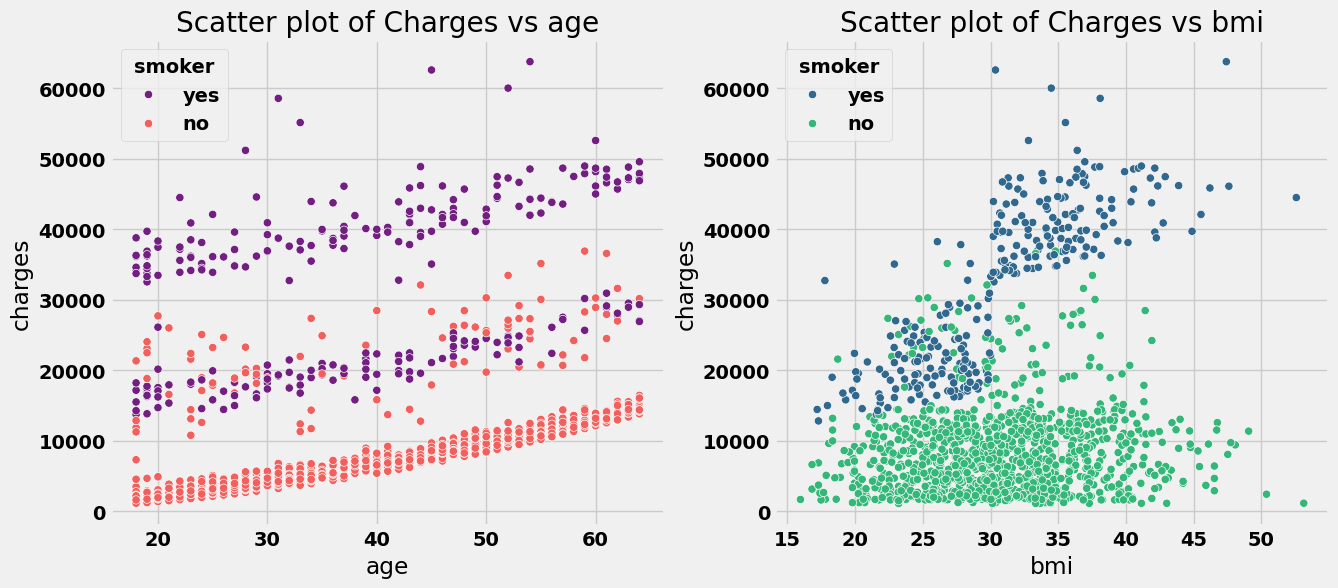

In [111]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take  1st   and  2nd slab, for smoker policy start at  2nd   and  3rd   slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 $kg/m^2$
  and maximum upto 54 $kg/m^2$

* ### Data Preprocessing:
   * #### Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.
   * #### A __One hot encoding__ is a representation of categorical variable as binary vectors.

In [81]:
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [82]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


C:\Users\MAHE\AppData\Local\Temp\ipykernel_18352\1119713767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='r',ax=ax)
C:\Users\MAHE\AppData\Local\Temp\ipykernel_18352\1119713767.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),bins=40,c

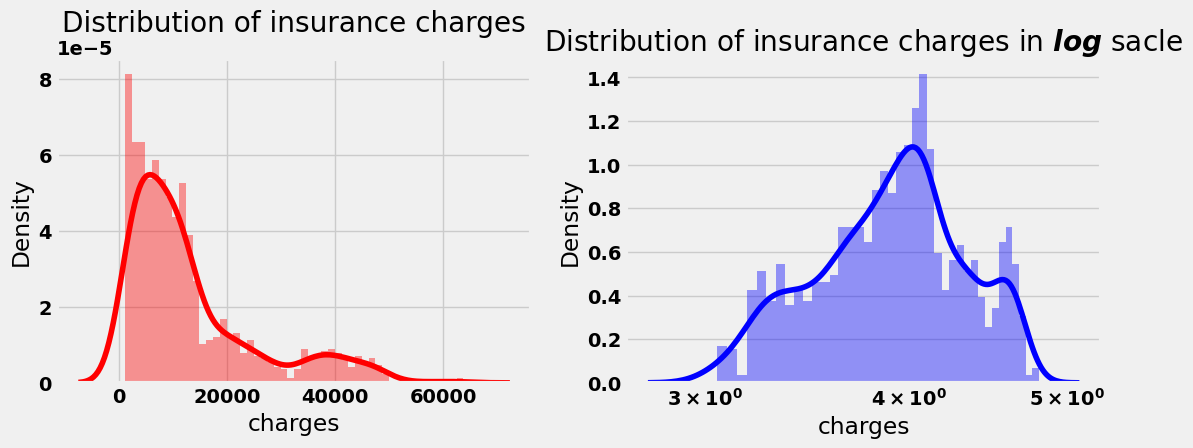

In [83]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

* #### If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed.
* #### In right plot we applied natural log, then plot approximately tends to normal.
* #### Therefore, for further analysis we will apply log on target variable charges.

In [84]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

* #### Train Test split:

In [85]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

* ### Model building:
    * #### This step builds the model using our linear regression equation  $\theta=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$.
    * #### In the first step we need to add a feature  $x_0=1$ to our original data set.

In [86]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [87]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
parameter_df

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,7.059171
1,theta_1,age,0.033134
2,theta_2,bmi,0.013517
3,theta_3,OHE_male,-0.067767
4,theta_4,OHE_1,0.149457
5,theta_5,OHE_2,0.272919
6,theta_6,OHE_3,0.244095
7,theta_7,OHE_4,0.523339
8,theta_8,OHE_5,0.466030
9,theta_9,OHE_yes,1.550481


#### Parameters learning by scikit learn:

In [88]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


The parameter obtained from both the model are same.
So we succefully built our model using normal equation and verified using sklearn linear regression module.

* ### Model evaluation:
    * #### Empirical risk $\mathbf{R}_{emp}$ for the least squares loss function is
      $$
      \Large \mathbf{R}_{emp}(f,\mathbf{X},\mathbf{y})= \frac{1}{N} \sum_{t=1}^{N} (y^t-\hat{y}^t)^2 
     $$
    

In [89]:
# Normal equation
y_pred =  np.matmul(X_test_0,theta)

#Evaluvation: 
R_emp = np.sum((y_pred - y_test)**2)/ X_test_0.shape[0]
print('The Mean square error(MSE) or Remp(f,X,y) for the least squares loss function is: ',R_emp)

The Mean square error(MSE) or Remp(f,X,y) for the least squares loss function is:  0.1872962232298182


* ### Other metrics:
    * #### Since the loss function that we considered for empirical risk $\mathbf{R}_{emp}$ computation is the least squares function, the $\mathbf{R}_{emp}$ itself can be called as the mean square error (MSE).
      $$
      Mean\ Square\ Error (MSE)\ =\frac{1}{N} \sum_{t=1}^{N} (\hat{y}^t-y^t)^2
      $$
    * #### The below are the additional metrics that can be considered for evaluating the goodness of the linear regression model:
      $$
      Sum\ of\ Square\ Error (SSE)\ = \sum_{t=1}^{N} (\hat{y}^t-y^t)^2
      $$
      $$
      Sum\ of\ Square\ Total (SST)\ = \sum_{t=1}^{N} (y^t-\bar{y})^2
      $$
      &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; where $\hat{y}^t$ is the predicted value of $y^t$, and $\bar{y}$ is the mean of label vector $\mathbf{y}$
      $$
      \mathbf{R}^2\ =\ 1\ -\ \frac{SSE}{SST}
      $$
   &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; For the best model, the $\mathbf{R}^2$ will be 1.

In [90]:
# R_square 
sse = np.sum((y_pred - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

R square obtain for normal equation method is : 0.7795687545055328


#### Please make a note that we have transformed out the target variable "charges" by applying natural log. When we put model into production antilog must be applied to the equation.

In [91]:
y_pred
np.exp(y_pred)

array([11248.91691046,  5797.35684225, 31240.14454465,  8828.18218324,
        4482.74589041,  7946.30282673, 46645.4705688 ,  5225.13091419,
       13177.88416529, 57308.8202179 ,  3387.28392259, 62180.65700157,
        3637.44468061, 12647.25576959,  6678.52746981,  5081.47857203,
        5616.68904073,  3329.98728278, 34261.94177097, 34386.37924899,
       73354.68175197,  9498.12552398,  7066.22674023,  9779.79578244,
       39725.96499277,  4962.54803343,  5183.05925499, 14989.50219538,
        2933.89702508,  9127.39580238, 11946.08697156,  3523.64882304,
        4470.27216976, 12722.25356043,  6476.67170405, 18497.76324609,
       11722.34963902,  8343.66481942,  9977.07049486,  4398.10778658,
        9872.22995302, 39939.06546121,  9808.75098319, 38540.60908302,
       10515.38730307, 10925.7930576 ,  4777.16268402,  5201.83091737,
        8647.31671496,  5966.61260894, 12265.4364732 ,  6954.29394039,
        9307.18468635,  4029.22853046,  4635.56428023, 11538.35056459,
      

# <span style='color:Red'>Fitting the Linear Regression Model via the Gradient Descent (GD) Method</span> [[Ref]](https://www.kaggle.com/code/residentmario/gradient-descent-with-linear-regression)
***
* ### Gradient Descent is an iterative optimization algorithm that tries to find the optimum value (Minimum/Maximum) of an objective function.
* ### It is one of the most used optimization techniques in machine learning projects for updating the parameters of a model in order to minimize a cost function.
* ### The main aim of gradient descent is to find the best parameters of a model that gives the highest accuracy on training as well as testing datasets.
* ### Let $J(\theta)$ be the cost function that depends on the model's parameters $\theta$. The goal of any machine learning model is to estimate the $\theta$ that leads to minimum $J(\theta)$.
* ### Mathematically, the gradient descent algorithm is:
  $$
      \Large \mathbf{\theta}^{i+1}=\mathbf{\theta}^{i}-\alpha \nabla \mathbf{J}
  $$
 &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;   where $[\mathbf{\theta}] \in \mathbb{R}^{D+1}$ is the parameter vector of dimention $D+1$; &nbsp;&nbsp; $'i'$ is the iteration; &nbsp;&nbsp; $'\alpha'$ is the learning rate (or) step size; &nbsp;&nbsp; $'\nabla \mathbf{J}'$ is the gradient of $J$.
* ### Here, $\nabla \mathbf{J}$ is the gradient vector of $J$ evaluated for the current iteration of $\mathbf{\theta}^{i}$. It is the vector of partial derivatives of $J$ with respect to the paramters $\theta_0$, $\theta_1$,.....$\theta_{D+1}$ of the vector $\mathbf{\theta} \in \mathbb{R}^{D+1}$.
  $$
     \Large \nabla \mathbf{J}=
      \begin{bmatrix}
          \frac{\partial \mathbf{J}}{\partial \theta_0}\\
          \frac{\partial \mathbf{J}}{\partial \theta_1}\\
          ..\\
          ..\\
          \frac{\partial \mathbf{J}}{\partial \theta_{D+1}}\\
      \end{bmatrix}
  $$
* ### In linear regression, the cost function $J(\theta)$ can be the sum of squares error function:
  $$
       \Large J(\theta)= \sum_{t=1}^{N} (y^t\ -\ \theta^{T}\mathbf{x}^t)^2 
      $$
  $$
  \Large J(\theta)=|| \mathbf{y}\ -\ \mathbf{X}\theta || ^2
  $$
* ### The gradient $ \nabla \mathbf{J}$, by following Equation (3), is:
 $$
        \Large \nabla \mathbf{J}=  -2\mathbf{X}^T\mathbf{y}+ \mathbf{X}^T\mathbf{X}2\theta 
      $$
  <br>
* ### This leads the gradient descent algorithm to:
  $$
      \Large \mathbf{\theta}^{i+1}=\mathbf{\theta}^{i}-\alpha (-2\mathbf{X}^T\mathbf{y}+ \mathbf{X}^T\mathbf{X}2\theta) \tag 4
  $$
  <br>
  <br>
* ## <span style='color:Blue'>For simple Linear regression:</span>
* ### For the sake of simplicity, lets assume a simple linear regression model that works for the data of only 1-dimensional input feature. This model will have two parameters $\theta_1$ (slope) and $\theta_0$ (intercept).
* ### Ideally, the cost function $J$ is assumed to be a convex optimization function that looks as follows: 
  &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     <img src="images/Gradient_Descent1.png" width="800" height="450">
* ### Although the contour of cost function $J$ doesn't exist perfectly like above, it still serves as a decent pedagogical tool to get some of the most important ideas about gradient descent.
* ### Our goal is to find the particular combination of $\begin{bmatrix} \theta_0\\ \theta_1 \end{bmatrix}$ for which the cost $J$ is minimum. Such a point is called a minima for the cost function.
  <br>
* ### If we randomly initialize the values of $\begin{bmatrix} \theta_0\\ \theta_1 \end{bmatrix}$, its cost $J$ will be random and most likely it will not be the possible minimum.
* ### With this random initialization, the model probably behaves like a drunk version of yourself, classifying images of cats as humans. Such a situation correspond to point A on the below contour, where the network is performing badly and consequently the loss is high.
&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     <img src="images/Gradient_Descent2.png" width="800" height="450">
* ### We need to find a way to somehow navigate to the bottom of the “valley” to point B, where the loss function has a minima? So how do we do that?
  <br>
  <br>
* ### The gradient descent algorithm for $\begin{bmatrix} \theta_0\\ \theta_1 \end{bmatrix}$ can be written as:
  $$
      \Large \begin{bmatrix} \theta_0\\ \theta_1 \end{bmatrix}^{i+1} =\begin{bmatrix} \theta_0\\ \theta_1 \end{bmatrix}^{i}-\alpha \begin{bmatrix}
          \frac{\partial J}{\partial \theta_0}\\
          \frac{\partial J}{\partial \theta_1}\\
      \end{bmatrix}
  $$
* ### To simplify the visualization, lets analyze the effect of gradient descent on parameters $\theta_0$ and $\theta_1$ separately:
  $$
      \Large \theta_0^{i+1} =\theta_0^{i}-\alpha  \frac{\partial J}{\partial \theta_0}
  $$
  $$
      \Large \theta_1^{i+1} =\theta_1^{i}-\alpha  \frac{\partial J}{\partial \theta_1}
  $$
* ### During each iteration, gradient descent step-downs the cost function in the direction of the steepest descent (i.e., opposite of gradient).
* ### By adjusting the parameters in this direction, it seeks to reach the minimum of the cost function and find the best-fit values for the parameters.
* ### If the gradient (i.e. slope) is positive, it necessitates to adjust the parameter $\theta_0$ to reverse the direction towards the steepest descent of the cost function: $\theta_0^{i+1}=\theta_0^i\ -\ (\ +ve\ value\ )$ 
&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     <img src="images/Gradient_Descent3.png" width="600" height="300">
* ### If the gradient (i.e. slope) is negative, the parameter $\theta_0$ can be continued towards the current direction of steepest descent of the cost function: $\theta_0^{i+1}=\theta_0^i\ -\ (\ -ve\ value\ )$ 
&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     <img src="images/Gradient_Descent4.png" width="600" height="300">
* ### Choosing learning rate $\alpha$:
    * #### Once we have the direction we want to move in, we must decide the size of the step we must take. The size of this step is called the learning rate. We must choose it carefully to ensure we can get down to the minima.
    * #### If we go too fast, we might overshoot the minima, and keep bouncing along the ridges of the “valley” without ever reaching the minima.
     &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     <img src="images/Gradient_Descent5.jpg" width="300" height="150">
     * #### If we choose $\alpha$ to be very small, Gradient Descent will take small steps to reach local minima and will take a longer time to reach minima.
     &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     <img src="images/Gradient_Descent6.jpg" width="300" height="150">
    * #### In practice, we might never exactly reach the minima, but we keep oscillating in a flat region in the close vicinity of the minima.
    * #### As we oscillate in this region, the loss is almost the minimum we can achieve, and doesn’t change much as we just keep bouncing around the actual minimum.
    * #### Often, we stop our iterations when the loss values haven’t improved in a pre-decided number, say, 10, or 20 iterations. When such a thing happens, we say our training has converged, or convergence has occurred.
  <br>
  <br>


* ## <span style='color:Blue'>Python Implementation of Linear regression:</span>

* ### Let $\mathbf{X}=\begin{bmatrix} 1 & x_1^1\\ 1 & x_1^2\\ . &.\\ .&.\\1 & x_1^N \end{bmatrix}  $ be the input data with only one feature $\mathbf{x}_1$; and $\mathbf{y}=\begin{bmatrix} y^1\\ y^2\\ . \\ .\\y^N \end{bmatrix}  $ be the output data. This needs to learn two parameters $\theta=\begin{bmatrix} \theta_0\\ \theta_1\end{bmatrix}$ to build the machine learning model.

* ### Recall Equation 4 and rearrange it to implement the ML model for the given data in python
  $$
      \Large \mathbf{\theta}^{i+1}=\mathbf{\theta}^{i}-\alpha (-2\mathbf{X}^T\mathbf{y}+ \mathbf{X}^T\mathbf{X}2\theta) \tag 4
  $$
  $$
      \Large \begin{bmatrix} \theta_0\\\theta_1 \end{bmatrix}^{i+1}=\begin{bmatrix} \theta_0\\\theta_1 \end{bmatrix}^{i}-2\alpha (- 
      \begin{bmatrix} 
       1 & 1 & . & . & 1\\ x_1^1 & x_1^2 &.&.& x_1^N 
       \end{bmatrix}
       \begin{bmatrix} y^1\\ y^2\\ . \\ .\\y^N \end{bmatrix} + \begin{bmatrix} 1 & 1 & . & . & 1\\ x_1^1 & x_1^2 &.&.& x_1^N \end{bmatrix}\begin{bmatrix} 1 & x_1^1\\ 1 & x_1^2\\ . &.\\ .&.\\1 & x_1^N \end{bmatrix}\begin{bmatrix} \theta_0\\ \theta_1\end{bmatrix}) 
  $$

$$
      \Large \begin{bmatrix} \theta_0\\\theta_1 \end{bmatrix}^{i+1}=\begin{bmatrix} \theta_0\\\theta_1 \end{bmatrix}^{i} - 
      2\alpha (- 
      \begin{bmatrix} 
       \mathbf{y}_{sum}\\
        \mathbf{x}_1^T\mathbf{y}
       \end{bmatrix}
        + \begin{bmatrix} 1 & \mathbf{x_1}_{sum}\\ \mathbf{x_1}_{sum} & \mathbf{x}_1.\mathbf{x}_1 \end{bmatrix}\begin{bmatrix} \theta_0\\ \theta_1\end{bmatrix}) 
  $$
 
 &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; where $\mathbf{y}_{sum}=y^1\ +\ y^2\ +\ ....\ y^N$ and $\mathbf{x_1}_{sum}=x_1^1\ +\ x_1^2\ +\ ....\ x_1^N$

$$
      \Large \begin{bmatrix} \theta_0\\\theta_1 \end{bmatrix}^{i+1}=\begin{bmatrix} \theta_0\\\theta_1 \end{bmatrix}^{i} - 
      2\alpha  
      \begin{bmatrix} 
       -\mathbf{y}_{sum} + \theta_0 +
        \theta_1\mathbf{x_1}_{sum}\\
        -\mathbf{x}_1^T\mathbf{y}+\theta_0\mathbf{x_1}_{sum}+\theta_1\mathbf{x}_1.\mathbf{x}_1\end{bmatrix}
  $$
  $$
  \Large \theta_0^{i+1}=\theta_0^{i}-2\alpha(-\mathbf{y}_{sum}+\theta_0^i+\theta_1^i\mathbf{x_1}_{sum})
  $$
  $$
  \Large \theta_1^{i+1}=\theta_1^{i}-2\alpha(-\mathbf{x}_1^T\mathbf{y}+\theta_0\mathbf{x_1}_{sum}+\theta_1\mathbf{x}_1.\mathbf{x}_1)
  $$

In [1]:
import numpy as np

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        theta_0 = 0
        theta_1 = 1
        cost=[]
        n = X.shape[0]
        m = len(y)
        for p in range(self.iterations):
            theta_0_gradient = 2 * np.sum(-y+(theta_0+theta_1*X)) / n
            theta_1_gradient = 2 * np.sum((-y+(theta_0+theta_1*X))*X) / n
            theta_0 = theta_0 - (self.learning_rate * theta_0_gradient)
            theta_1 = theta_1 - (self.learning_rate * theta_1_gradient)
            y_pred = theta_1*X+theta_0
            MSE = np.sum((y_pred - y)**2)/ n
            cost.append(MSE)
        self.theta_1, self.theta_0, self.cost = theta_1, theta_0, cost
        
        
    def predict(self, X):
        return self.theta_1*X + self.theta_0


In [2]:
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)
[X.shape,y.shape]

[(100,), (100,)]

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

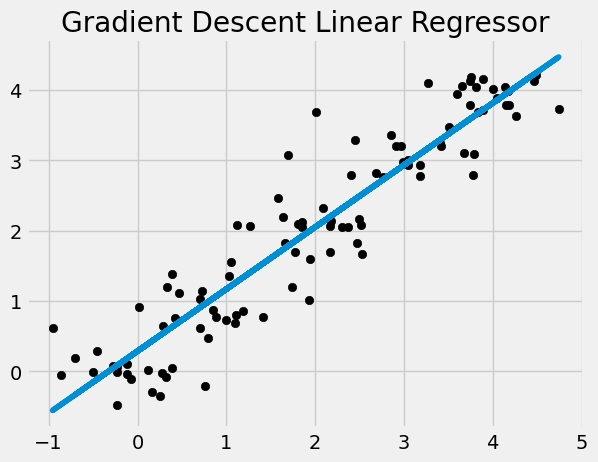

In [4]:
clf = GradientDescentLinearRegression()
clf.fit(X, y)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X, y, color='black')
plt.plot(X, clf.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")

In [5]:
clf.theta_0

0.28844625040113936

In [6]:
clf.theta_1

0.8813942046280622

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

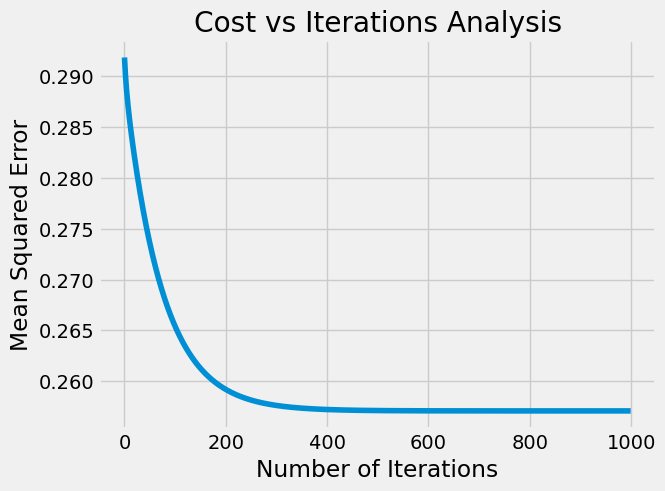

In [7]:
clf.cost
plt.plot(range(1000),clf.cost)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')

* ##  <span style='color:Blue'>Advantages Of Gradient Descent </span>
    * ### Flexibility: Gradient Descent can be used with various cost functions and can handle non-linear regression problems.
    * ### Scalability: Gradient Descent is scalable to large datasets since it updates the parameters for each training example one at a time.
    * ### Convergence: Gradient Descent can converge to the global minimum of the cost function, provided that the learning rate is set appropriately.

* ##  <span style='color:Blue'>Disadvantages Of Gradient Descent </span>                                                                          
    * ### Sensitivity to Learning Rate: The choice of learning rate can be critical in Gradient Descent since using a high learning rate can cause the algorithm to overshoot the minimum, while a low learning rate can make the algorithm converge slowly.
    * ### Slow Convergence: Gradient Descent may require more iterations to converge to the minimum since it updates the parameters for each training example one at a time.
    * ### Local Minima: Gradient Descent can get stuck in local minima if the cost function has multiple local minima.
    * ### Noisy updates: The updates in Gradient Descent are noisy and have a high variance, which can make the optimization process less stable and lead to oscillations around the minimum.

* ##  <span style='color:Blue'>Summary: Steps Required in Gradient Descent Algorithm  </span>  
    * ### Step 1: We first initialize the parameters of the model randomly. 
    * ### Step 2: Compute the gradient of the cost function with respect to each parameter. It involves making partial differentiation of cost function with respect to the parameters. 
    * ### Step 3: Update the parameters of the model by taking steps in the opposite direction of the model. Here, we choose a hyperparameter learning rate, which is denoted by alpha. It helps in deciding the step size of the gradient. 
    * ### Step 4: Repeat steps 2 and 3 iteratively to get the best parameter for the defined model
